# <a href="https://mipt-stats.gitlab.io/courses/python.html">Python для анализа данных</a>

## Библиотека `scipy` (модуль `scipy.stats`)

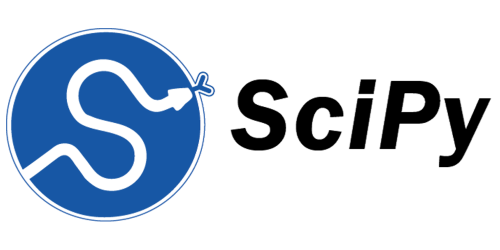

Нам пригодится только модуль `scipy.stats`.
Полное описание доступно по <a  target="_blank" href="http://docs.scipy.org/doc/scipy/reference/stats.html">ссылке</a>. По ссылке можно прочитать полную документацию по работе с непрерывными (Continuous), дискретными (Discrete) и многомерными (Multivariate) распределениями. Пакет также предоставляет некоторое количество статистических методов, которые рассматриваются в курсах статистики.

In [1]:
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Работа с библиотекой `scipy.stats`.

<b>Общий принцип:</b>

Пусть $X$ — класс, реализующий некоторое распределение. Конкретное распределение с параметрами `params` можно получить как **`X(params)`**. У него доступны следующие методы:


* `X(params).rvs(size=N)` — генерация выборки размера $N$ (<b>R</b>andom <b>V</b>ariate<b>S</b>). Возвращает `numpy.array`;
* `X(params).cdf(x)` — значение функции распределения в точке $x$ (<b>C</b>umulative <b>D</b>istribution <b>F</b>unction);
* `X(params).logcdf(x)` — значение логарифма функции распределения в точке $x$;
* `X(params).ppf(q)` — $q$-квантиль (<b>P</b>ercent <b>P</b>oint <b>F</b>unction);
* `X(params).mean()` — математическое ожидание;
* `X(params).median()` — медиана ($1/2$-квантиль);
* `X(params).var()` — дисперсия (<b>Var</b>iance);
* `X(params).std()` — стандартное отклонение = корень из дисперсии (<b>St</b>andard <b>D</b>eviation).

Кроме того для непрерывных распределений определены функции
* `X(params).pdf(x)` — значение плотности в точке $x$ (<b>P</b>robability <b>D</b>ensity <b>F</b>unction);
* `X(params).logpdf(x)` — значение логарифма плотности в точке $x$.

А для дискретных
* `X(params).pmf(k)` — значение дискретной плотности в точке $k$ (<b>P</b>robability <b>M</b>ass <b>F</b>unction);
* `X(params).logpdf(k)` — значение логарифма дискретной плотности в точке $k$.

Все перечисленные выше методы применимы как к конкретному распределению `X(params)`, так и к самому классу `X`. Во втором случае параметры передаются в сам метод. Например, вызов `X.rvs(size=N, params)` эквивалентен `X(params).rvs(size=N)`. При работе с распределениями и случайными величинами рекомендуем использовать первый способ, посколько он больше согласуется с математическим синтаксисом теории вероятностей.

Параметры могут быть следующими:
* `loc` — параметр сдвига;
* `scale` — параметр масштаба;
* и другие параметры (например, $n$ и $p$ для биномиального).

---

Для примера сгенерируем выборку размера $N = 200$ из распределения $\mathcal{N}(1, 9)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.norm`, а `params` = (`loc=1, scale=3`).

*Примечание.* Выборка — набор независимых одинаково распределенных случайных величин. Часто в разговорной речи выборку отождествляют с ее *реализацией* — значения случайных величин из выборки при "выпавшем" элементарном исходе.

In [2]:
sample = sps.norm(loc=1, scale=3).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [ 0.65179639 -0.66437884  0.61450407 -0.1828078   0.42271419  0.14424901
  2.01547486  7.81094724 -1.35246891 -1.35574313]
Выборочное среденее: 0.854
Выборочная дисперсия: 9.118


Вероятностные характеристики

In [3]:
print('Плотность:\t\t', sps.norm(loc=1, scale=3).pdf([-1, 0, 1, 2, 3]))
print('Функция распределения:\t', sps.norm(loc=1, scale=3).cdf([-1, 0, 1, 2, 3]))

Плотность:		 [0.10648267 0.12579441 0.13298076 0.12579441 0.10648267]
Функция распределения:	 [0.25249254 0.36944134 0.5        0.63055866 0.74750746]


$p$-квантиль распределения с функцией распределения $F$ — это число $min\{x: F(x) \geqslant p\}$.

In [4]:
print('Квантили:', sps.norm(loc=1, scale=3).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Квантили: [-3.93456088 -2.8446547   1.          4.8446547   5.93456088]


Cгенерируем выборку размера $N = 200$ из распределения $Bin(10, 0.6)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.binom`, а `params` = (`n=10, p=0.6`).

In [5]:
sample = sps.binom(n=10, p=0.6).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [7 5 7 8 3 4 7 7 7 9]
Выборочное среденее: 6.165
Выборочная дисперсия: 2.168


In [6]:
print('Дискретная плотность:\t', sps.binom(n=10, p=0.6).pmf([-1, 0, 5, 5.5, 10]))
print('Функция распределения:\t', sps.binom(n=10, p=0.6).cdf([-1, 0, 5, 5.5, 10]))

Дискретная плотность:	 [0.00000000e+00 1.04857600e-04 2.00658125e-01 0.00000000e+00
 6.04661760e-03]
Функция распределения:	 [0.00000000e+00 1.04857600e-04 3.66896742e-01 3.66896742e-01
 1.00000000e+00]


In [7]:
print('Квантили:', sps.binom(n=10, p=0.6).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Квантили: [3. 4. 6. 8. 8.]


Отдельно есть класс для <b>многомерного нормального распределения</b>.
Для примера сгенерируем выборку размера $N=200$ из распределения $\mathcal{N} \left( \begin{pmatrix} 1 \\ 1 \end{pmatrix},  \begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix} \right)$.

In [8]:
sample = sps.multivariate_normal(
    mean=[1, 1], cov=[[2, 1], [1, 2]]
).rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее:', sample.mean(axis=0))
print('Выборочная матрица ковариаций:\n', np.cov(sample.T))

Первые 10 значений выборки:
 [[ 1.69374692  1.88819464]
 [ 0.06094306  1.10440123]
 [ 0.9985689   0.38793314]
 [-0.05124054  2.64624984]
 [-1.08093916 -0.74553625]
 [ 1.50160454  1.71582213]
 [-0.24648123 -2.37643511]
 [ 1.55031141  1.12400891]
 [ 0.08503169  1.19245874]
 [-0.1134207   0.21094917]]
Выборочное среденее: [0.84928867 0.91685823]
Выборочная матрица ковариаций:
 [[1.86556049 1.00332244]
 [1.00332244 2.2325611 ]]


Некоторая хитрость :)

In [9]:
sample = sps.norm(loc=np.arange(10), scale=0.1).rvs(size=10)
print(sample)

[0.05009553 1.02867603 1.89595868 3.01659664 3.83682401 4.98726169
 6.05236321 7.09904293 7.94902725 8.9902001 ]


Бывает так, что <b>надо сгенерировать выборку из распределения, которого нет в `scipy.stats`</b>.
Для этого надо создать класс, который будет наследоваться от класса `rv_continuous` для непрерывных случайных величин и от класса `rv_discrete` для дискретных случайных величин.
<a  target="_blank" href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous">Пример из документации.</a>

Для примера сгенерируем выборку из распределения с плотностью $f(x) = \frac{4}{15} x^3 I\{x \in [1, 2] = [a, b]\}$.

In [10]:
class cubic_gen(sps.rv_continuous):
    def _pdf(self, x):
        return 4 * x ** 3 / 15
cubic = cubic_gen(a=1, b=2, name='cubic')

sample = cubic.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [1.45678688 1.93053454 1.97369852 1.49545567 1.81143562 1.52569568
 1.73986517 1.53557906 1.57319167 1.98652277]
Выборочное среденее: 1.648
Выборочная дисперсия: 0.069


Если дискретная случайная величина может принимать небольшое число значений, то можно не создавать новый класс, как показано выше, а явно указать эти значения и из вероятности.

In [11]:
some_distribution = sps.rv_discrete(
    name='some_distribution', 
    values=([1, 2, 3], [0.6, 0.1, 0.3])  # значения и вероятности
)

sample = some_distribution.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Частота значений по выборке:', 
      (sample == 1).mean(), (sample == 2).mean(), (sample == 3).mean())

Первые 10 значений выборки:
 [3 1 3 1 1 1 1 1 3 3]
Выборочное среденее: 1.855
Частота значений по выборке: 0.52 0.105 0.375


### 2. Свойства абсолютно непрерывных распределений

Прежде чем исследовать свойства распределений, напишем вспомогательную функцию для отрисовки плотности распределения. 

In [12]:
def show_pdf(pdf,  xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    
    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)  
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()

#### 2.1 Нормальное распределение

$\mathcal{N}(a, \sigma^2)$ — нормальное распределение. 
  
Параметры в `scipy.stats`:  
* `loc` = $a$,
* `scale` = $\sigma$.

Свойства распределения: 
* математическое ожидание: $a$,
* дисперсия: $\sigma^2$.

Посмотрим, как выглядит плотность нормального стандартного распределения $\mathcal{N}(0, 1)$:

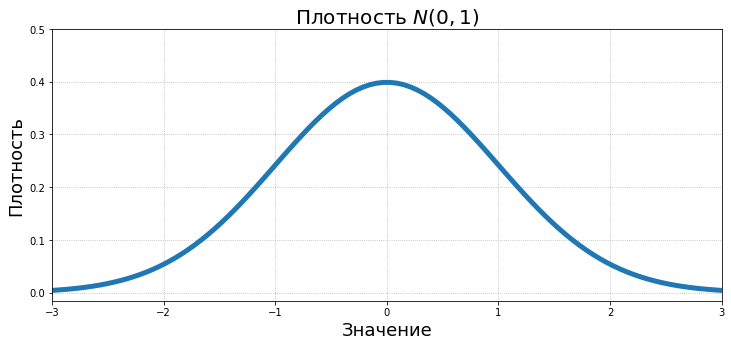

In [13]:
show_pdf(
    pdf=sps.norm.pdf, xmin=-3, xmax=3, ymax=0.5, grid_size=100, 
    distr_name=r'$N({loc}, {scale})$', loc=0, scale=1
)

Сгенерируем значения из нормального стандартного распределения и сравним гистограмму с плотностью:

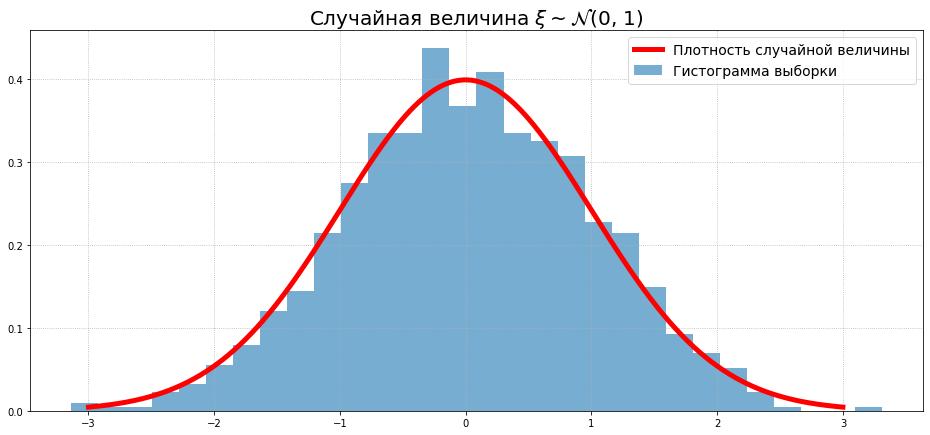

In [14]:
sample = sps.norm.rvs(size=1000)  # выборка размера 1000
grid = np.linspace(-3, 3, 1000)  # сетка для построения графика

plt.figure(figsize=(16, 7))
plt.hist(sample, bins=30, density=True, 
         alpha=0.6, label='Гистограмма выборки') 
plt.plot(grid, sps.norm.pdf(grid), color='red', 
         lw=5, label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim \mathcal{N}$(0, 1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

Исследуем, как меняется плотность распределения в зависимости от параметров.



In [15]:
# создать виджет, но не отображать его
ip = widgets.interactive(show_pdf,
    pdf=widgets.fixed(sps.norm.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
    xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
    xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
    ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
    loc = widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
    scale = widgets.FloatSlider(min=0.01, max=2, step=0.01, value=1),
    distr_name = r'$N$({loc}, {scale})'
);

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[5:7]))

# отображаем вывод функции
display(ip.children[-1])
ip.update() # чтобы функция запустилась до первого изменения слайдеров

Output()

Показательный пример с разными значениями параметров распределения: 

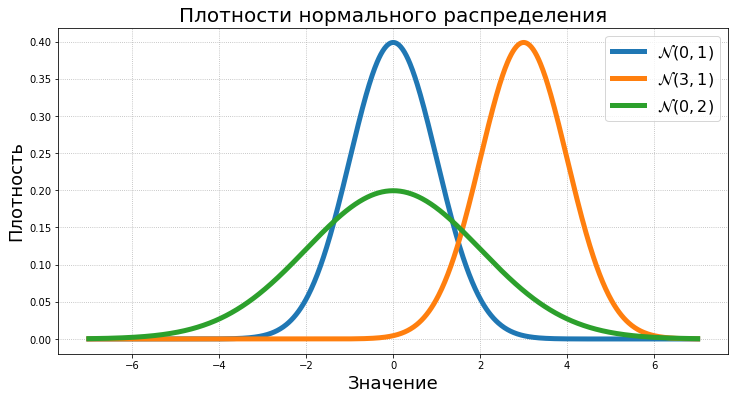

In [16]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
loc_values = [0, 3, 0]  # набор значений параметра a
sigma_values = [1, 1, 2]  # набор значений параметра sigma

plt.figure(figsize=(12, 6))

for i, (a, sigma) in enumerate(zip(loc_values, sigma_values)):
    plt.plot(grid, sps.norm(a, sigma).pdf(grid), lw=5, 
             label='$\mathcal{N}' + '({}, {})$'.format(a, sigma))

plt.legend(fontsize=16)
plt.title('Плотности нормального распределения', fontsize=20)
plt.xlabel('Значение', fontsize=18)
plt.ylabel('Плотность', fontsize=18)
plt.grid(ls=':')
plt.show()

Значения параметров определяют положение и форму кривой на графике распределения, каждой комбинации параметров соответствует уникальное распределение.


Для нормального распределения:
* Параметр $loc = a$ отвечает за смещение кривой вдоль $\mathcal{Ox}$, тем самым определяя положение вертикальной оси симметрии плотности распределения. Вероятность того, что значение случайной величины $x$ попадет в отрезок $\mathcal{[m; n]}$, равна площади участка, зажатого кривой плотности, $\mathcal{Ox}$ и вертикальными прямыми ${x = m}$, ${x = n}$. В точке $a$ значение плотности распределения наибольшее, соответственно вероятность того, что значение случайной величины, имеющей нормальное распределение, попадет в окрестность точки $а$ — наибольшая.

  
* параметр ${scale = \sigma}$ отвечает за смещение экстремума вдоль  $\mathcal{Oy}$ и "прижимание" кривой к вертикальной прямой  ${x = a}$, тем самым увеличивая площадь под кривой плотности в окрестности точки $а$. Другими словами, этот параметр отвечает за дисперсию — меру разброса значений случайной величины. При уменьшении параметра $\sigma$ увеличивается вероятность того, что нормально распределенная случайная величина будет равна $a$. Это соответствует мере разброса значений случайной величины относительно её математического ожидания, то есть дисперсии $\sigma^2$.

Проверим несколько полезных свойств нормального распределения.

Пусть $\xi_1 \sim \mathcal{N}(a_1, \sigma_1^2)$ и $\xi_2 \sim \mathcal{N}(a_2, \sigma_2^2)$ — независимые случайные величины. Тогда $\xi_3 = \xi_1 + \xi_1 \sim \mathcal{N}(a_1 + a_2, \sigma_1^2 + \sigma_2^2)$ 

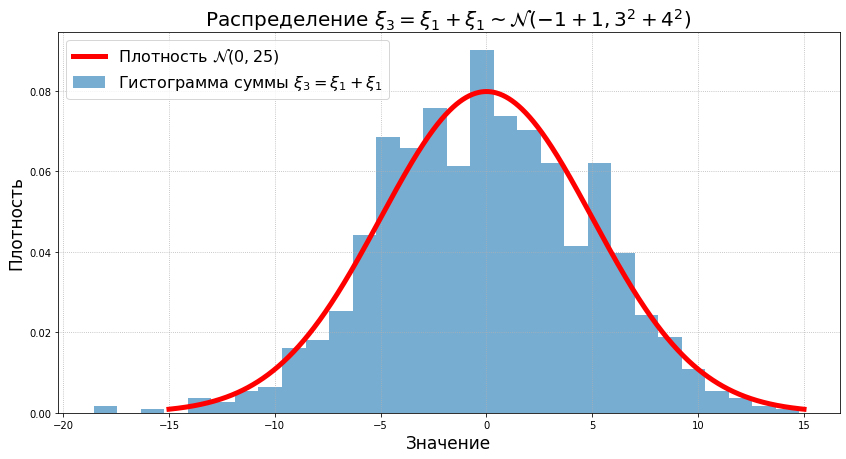

In [17]:
sample1 = sps.norm(loc=-1, scale=3).rvs(size=1000)
sample2 = sps.norm(loc=1, scale=4).rvs(size=1000)
sample3 = sample1 + sample2

grid = np.linspace(-15, 15, 1000)

plt.figure(figsize=(14,7))
plt.hist(sample3, density=True, bins=30, alpha=0.6, 
         label=r'Гистограмма суммы $\xi_3 = \xi_1 + \xi_1$')
plt.plot(grid, sps.norm(-1 + 1, np.sqrt(3*3 + 4*4)).pdf(grid), 
         color='red', lw=5, label=r'Плотность $\mathcal{N}(0, 25)$')
plt.title(
    r'Распределение $\xi_3=\xi_1+\xi_1\sim\mathcal{N}(-1 + 1, 3^2 + 4^2)$ ', 
    fontsize=20
)
plt.xlabel('Значение', fontsize=17)
plt.ylabel('Плотность', fontsize=17)
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

Пусть $\xi$ из $\mathcal{N}(a, \sigma^2)$. Тогда $\xi_{new} = c\xi\sim\mathcal{N}(c  a,  c^2  \sigma^2)$ 

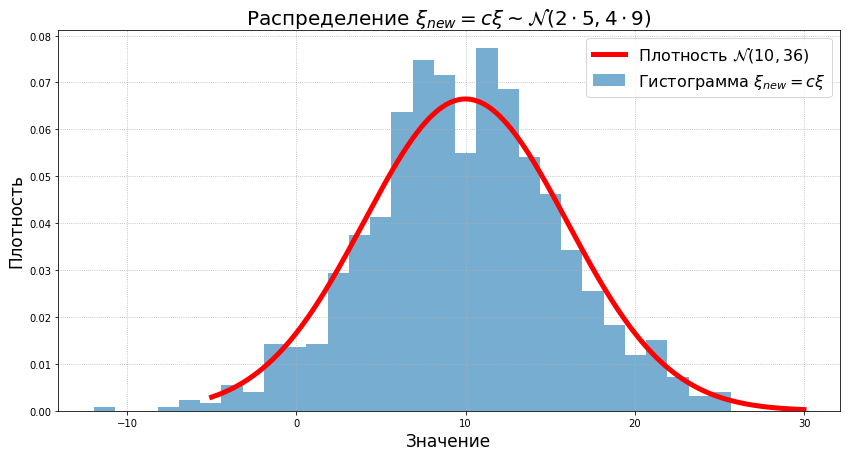

In [18]:
sample = sps.norm(loc=5, scale=3).rvs(size=1000)
grid = np.linspace(-5, 30, 1000)

c = 2
new_sample = c*sample

plt.figure(figsize=(14,7))
plt.hist(new_sample, density=True, bins=30, alpha=0.6, 
         label=r'Гистограмма $\xi_{new} = c \xi$')
plt.plot(grid, sps.norm(c*5, c*3).pdf(grid), color='red', 
         lw=5, label=r'Плотность $\mathcal{N}(10, 36)$')
plt.title(
    r'Распределение $\xi_{new}=c \xi\sim\mathcal{N}(2\cdot5, 4\cdot9)$', 
    fontsize=20
)
plt.xlabel('Значение', fontsize=17)
plt.ylabel('Плотность', fontsize=17)
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

#### 2.2 Равномерное распределение

${U}(a, b)$ — равномерное распределение. 
  
Параметры в `scipy.stats`:  
* `loc` = $a$,
* `scale` = $b-a$.

Свойства распределения: 
* математическое ожидание: $\frac{a+b}{2}$,
* дисперсия: $\frac{(b-a)^2}{12}$.

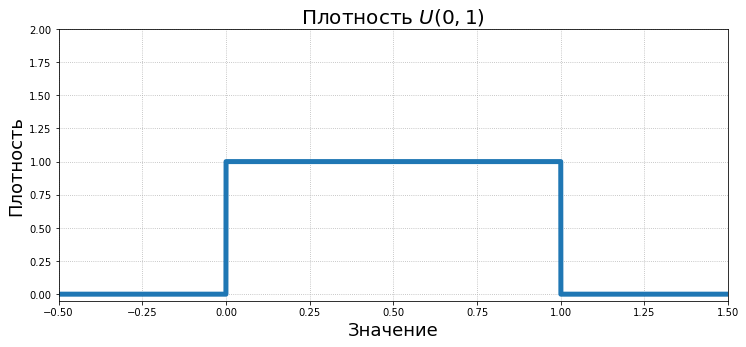

In [19]:
show_pdf(
    pdf=sps.uniform.pdf, xmin=-0.5, xmax=1.5, ymax=2, grid_size=10000, 
    distr_name=r'$U(0, 1)$', loc=0, scale=1
)

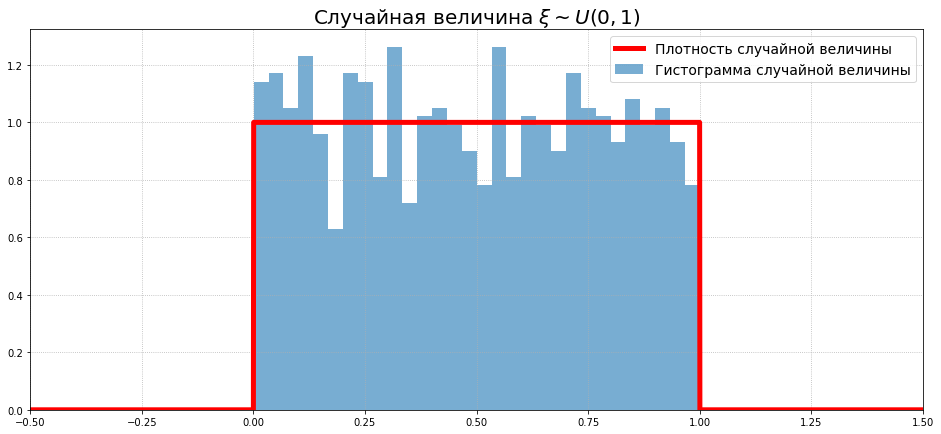

In [20]:
grid = np.linspace(-3, 3, 10001)  # сетка для построения графика
sample = sps.uniform.rvs(size=1000)  # выборка размера 1000

plt.figure(figsize=(16, 7))
plt.hist(sample,  bins=30, density=True, alpha=0.6, 
         label='Гистограмма случайной величины') 
plt.plot(grid, sps.uniform.pdf(grid), color='red', lw=5, 
         label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi\sim U(0, 1)$', fontsize=20)
plt.xlim(-0.5, 1.5)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

In [21]:
# создать виджет, но не отображать его
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sps.uniform.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=500),
    xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
    xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
    ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1.4),
    loc=widgets.FloatSlider(min=-4, max=0, step=0.1, value=0),
    scale=widgets.FloatSlider(min=0.01, max=4, step=0.01, value=1),
    distr_name=r'$U$({loc}, {loc} + {scale})'
);

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[5:7]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

Output()

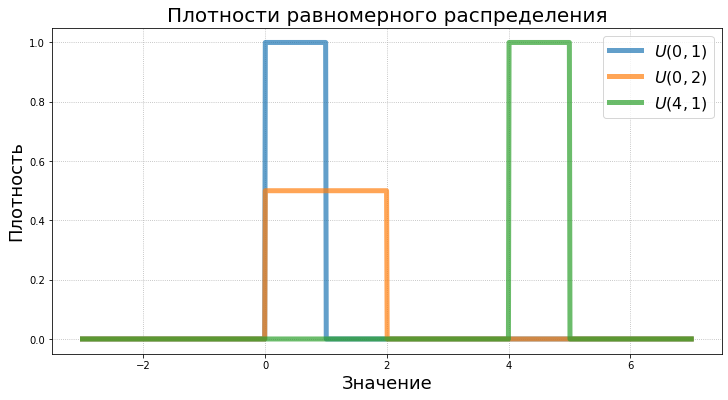

In [22]:
grid = np.linspace(-3, 7, 1000)  # сетка для построения графика
loc_values = [0, 0, 4]  # набор значений параметра a
scale_values = [1, 2, 1]  # набор значений параметра scale

plt.figure(figsize=(12, 6))
for i, (loc, scale) in enumerate(zip(loc_values, scale_values)):
    plt.plot(grid, sps.uniform(loc, scale).pdf(grid), lw=5, alpha=0.7, 
             label='$U' + '({}, {})$'.format(loc, scale))

plt.legend(fontsize=16)
plt.title('Плотности равномерного распределения', fontsize=20)
plt.xlabel('Значение', fontsize=18)
plt.ylabel('Плотность', fontsize=18)
plt.grid(ls=':')
plt.show()

Для равномерного распределения:
* Параметр ${loc = a}$ определяет начало отрезка, на котором случайная величина равномерно распределена.
* Параметр ${scale = b-a}$ определяет длину отрезка, на котором задана случайная величина. Значение плотности распределения на данном отрезке убывает с ростом данного параметра, то есть с ростом длины этого отрезка. Чем меньше длина отрезка, тем больше значение плотности вероятности на отрезке.